### Boston House Pricing ML Prediction

Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the Dataset from SKLearn data hub 

### About the Dataset

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 
 prices and the demand for clean air', J. Environ. Economics & Management,
 
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 
 pages 244-261 of the latter.
 

 Variables in order:
 
 CRIM --      per capita crime rate by town
 
 ZN --     proportion of residential land zoned for lots over 25,000 sq.ft.
 
 INDUS --   proportion of non-retail business acres per town
 
 CHAS --    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 NOX --     nitric oxides concentration (parts per 10 million)
 
 RM --     average number of rooms per dwelling
 
 AGE --     proportion of owner-occupied units built prior to 1940
 
 DIS --     weighted distances to five Boston employment centres
 
 RAD --     index of accessibility to radial highways
 
 TAX --    full-value property-tax rate per $10,000
 
 PTRATIO --  pupil-teacher ratio by town
 
 B --       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT --    % lower status of the population
 
 MEDV --    Median value of owner-occupied homes in $1000's


In [7]:
# from sklearn.datasets import load_boston

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

In [ ]:
# boston = load_boston()

In [ ]:
# boston.keys()

### Preparing the Dataset

In [15]:
 feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
 #MEDV

In [16]:
# Making a dataframe from the dataset, combining the independent_features and target into a dataframe

dataset = pd.DataFrame(data, columns=feature_names)

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
## Adding the price features

dataset['Price'] = target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.to_csv('Boston_House_Dataset.csv', encoding='utf-8', index=True)

In [19]:
dataset['Price'].median()

21.2

In [20]:
# To find out the structure of the dataset

dataset.shape

(506, 14)

In [21]:
# Getting info about the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
# Getting statistical info about the dataset

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Exploratory Data Analysis (EDA) 

#### Correlation: 
This will help us understand the relationship within the dataset. 

In [23]:
# Getting the correlation of the dataset.
dataset.corr(method='pearson', min_periods=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Dataset Correlation Visuals

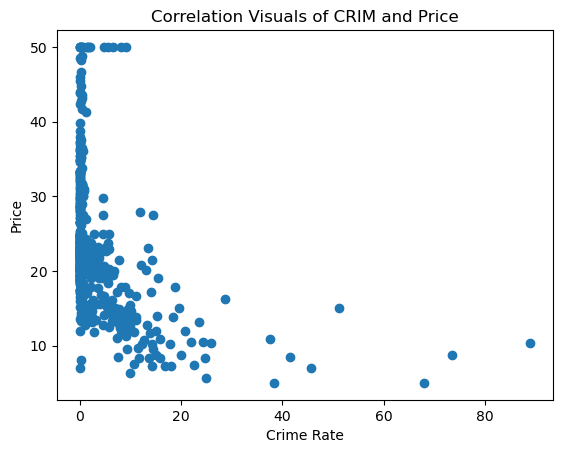

In [25]:
# Vizs of the relationship between the CRIM and Price.

plt.scatter(dataset['CRIM'], dataset['Price'])
plt.title('Correlation Visuals of CRIM and Price')
plt.ylabel('Price')
plt.xlabel('Crime Rate')
plt.show()

INSIGHT:
The above chart shows a negative linear relationship. We can see that as the crime rate decreases, the house pricing increases.

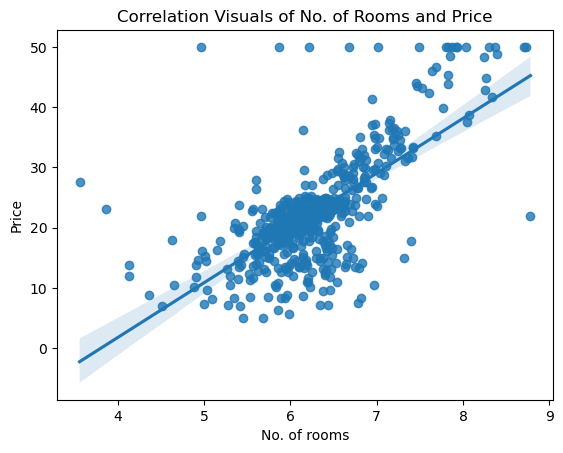

In [26]:
# Vizs of the relationship between the RM and Price.

sns.regplot(x='RM', y='Price', data=dataset)
plt.title('Correlation Visuals of No. of Rooms and Price')
plt.ylabel('Price')
plt.xlabel('No. of rooms')
plt.show()

INSIGHT:
The above chart shows a positive linear relationship. We can see that as the number of rooms increases, the house pricing increases.

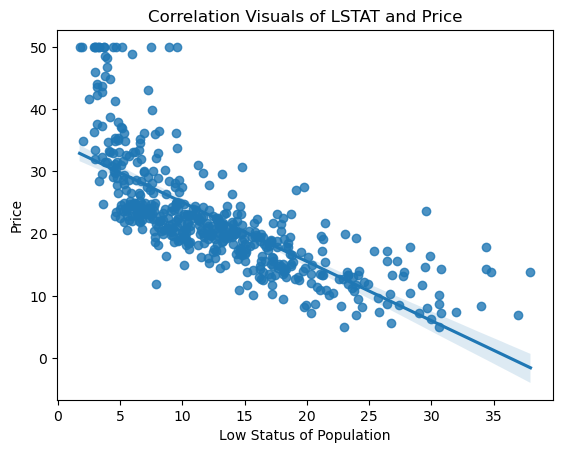

In [27]:
# Vizs of the relationship between the LSTAT and Price.

sns.regplot(x='LSTAT', y='Price', data=dataset)
plt.title('Correlation Visuals of LSTAT and Price')
plt.ylabel('Price')
plt.xlabel('Low Status of Population')
plt.show()

INSIGHT:
The above chart shows a negative linear relationship. We can see that as the Low Status of Population decreases, the house pricing increases.

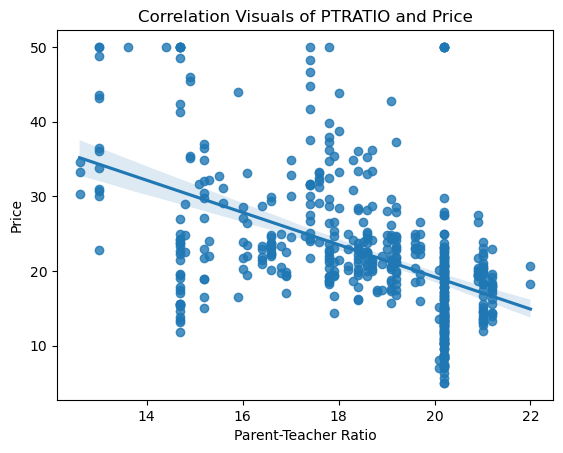

In [28]:
# Vizs of the relationship between the PTRATIO and Price.

sns.regplot(x='PTRATIO', y='Price', data=dataset)
plt.title('Correlation Visuals of PTRATIO and Price')
plt.ylabel('Price')
plt.xlabel('Parent-Teacher Ratio')
plt.show()

INSIGHT:
The above chart shows a negative linear relationship. We can see that as the PTRATIO decreases, the house pricing increases.

#### Building The Predictive Model

In [29]:
## Separating the dependent and independent features

x = dataset.iloc[:, :-1] # Independent features
y = dataset.iloc[:,-1]  # dependent target (label)= Price

In [30]:
## Splitting the data into Training and Testing data. The training data is used to train the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


#### Standardizing the Dataset

The Standard Scaling is performed to normalize the dataset into the same scale, hence to create uniformity. We use Grading decent. The aim is to come to a global minimal and create uniformity in our independent data.

In [31]:
# Calling out the library used to perform standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
# Performing standard scaling scaling on the x_train dataset
x_train = scaler.fit_transform(x_train)

In [33]:
# Performing standard scaling on the x_test dataset
x_test = scaler.transform(x_test)

### Training the Model

In [34]:
# Loading the library for the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [35]:
# To train the model

regression.fit(x_train, y_train)

LinearRegression()

In [36]:
# The coefficient and the intercept

print(regression.coef_)

# For every independent feature, there is a coefficient

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [37]:
# The interception of the dataset

print(regression.intercept_)

23.01581920903955


In [38]:
## Making Prediction

reg_pred=regression.predict(x_test)

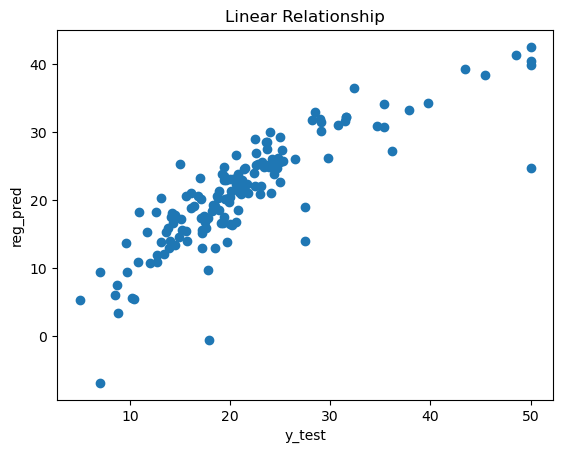

In [39]:
# Using a scatter plot to view the prediction 

plt.scatter(y_test, reg_pred)
plt.title('Linear Relationship')
plt.ylabel('reg_pred')
plt.xlabel('y_test')
plt.show()

### Evaluating the Model:
Evaluate the model to calculate the efficiency/accuracy of the system.

In [40]:
## Load the evaluating model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f'Mean absolute error : {mean_absolute_error(y_test, reg_pred)}')
print(f'Mean Squared error : {mean_squared_error(y_test, reg_pred)}')
print(f'Root mean squared error : {np.sqrt(mean_squared_error(y_test, reg_pred))}')

Mean absolute error : 3.162709871457405
Mean Squared error : 21.5174442311772
Root mean squared error : 4.63868992617282


### R Square and Adjusted R Square

Formula

##### R^2 = 1-SSR/SST

R^2=coefficient of the determination, SSR=sum of squares of residual SST=total sum of square

In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(round(score*100,2),'%')

71.12 %


#### Adjusted R2 =1-[(1-R2)*(n-1)/(n-k-1)]
where:
R2: Root square of the model, n:Number of observations, k: Number of predictor variables

In [42]:
# Display adjusted R-squared

adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

print(round(adjusted_r2*100,3), '%')

68.402 %


### Making Prediction

In [43]:
 #We have to first reshape the dataset into 2-D array

new_data_transf = data[0].reshape(1,-1)
new_data_transf

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [44]:
# We have to standardize the new data by transforming it

scaler.transform(new_data_transf)

C:\Users\ejosa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [45]:
regression.predict(scaler.transform(new_data_transf))

C:\Users\ejosa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

#### Pickling The Model File Deployment

In [ ]:
import pickle

In [ ]:
# Dump: Saving the predictive model as a pickle file
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))